In [1]:
# 5220411122
# MUHAMMAD HASBY MUHARRAMAN

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np

In [3]:
dataFrame = pd.read_csv('Bantuan Berupa Uang Partai Politik.csv')

print(dataFrame)

    _id                                     nama_partai  jlh_kursi  jlh_suara  \
0     1                 Partai Kebangkitan Bangsa (PKB)          3    131.988   
1     2        Partai Gerakan Indonesia Raya (Gerindra)          8    236.368   
2     3   Partai Demokrasi Indonesia Perjuangan (PDI-P)          1     48.704   
3     4                  Partai Golongan Karya (Golkar)          9    253.962   
4     5               Partai Nasional Demokrat (Nasdem)          2    131.521   
5     6                 Partai Keadilan Sejahtera (PKS)          6    152.255   
6     7              Partai Persatuan Pembangunan (PPP)          6    161.359   
7     8                    Partai Amanat Nasional (PAN)          6    211.957   
8     9              Partai Hati Nurani Rakyat (Hanura)          1     42.485   
9    10                                 Partai Demokrat         10    298.135   
10   11                                Partai Aceh (PA)         18     568.11   
11   12                     

In [4]:
dataFrame['bantuan_persuara'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16 entries, 0 to 15
Series name: bantuan_persuara
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 256.0 bytes


In [5]:
#Checking Missing Value
dataFrame['bantuan_persuara'].isnull().values.any()
dataFrame['bantuan_persuara'].isnull().sum()

0

In [6]:
dataFrame['bantuan_persuara'].value_counts()

bantuan_persuara
2    9
1    7
Name: count, dtype: int64

In [7]:
df_attribute = dataFrame.drop('bantuan_persuara', axis=1)

df_attribute.info()
df_attribute.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          16 non-null     int64 
 1   nama_partai  16 non-null     object
 2   jlh_kursi    16 non-null     int64 
 3   jlh_suara    16 non-null     object
 4   jumlah       16 non-null     object
dtypes: int64(2), object(3)
memory usage: 768.0+ bytes


(16, 5)

In [8]:
# Checking Missing Value
df_attribute.isnull().values.any()
df_attribute.isnull().sum()

_id            0
nama_partai    0
jlh_kursi      0
jlh_suara      0
jumlah         0
dtype: int64

In [9]:
category = dataFrame.select_dtypes(include = ['object'])
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama_partai  16 non-null     object
 1   jlh_suara    16 non-null     object
 2   jumlah       16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [10]:
dataframe_numerical = dataFrame.select_dtypes(include = ['int64'])
dataframe_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   _id               16 non-null     int64
 1   jlh_kursi         16 non-null     int64
 2   bantuan_persuara  16 non-null     int64
dtypes: int64(3)
memory usage: 512.0 bytes


In [11]:
index_numerical = dataframe_numerical.columns
index_numerical

Index(['_id', 'jlh_kursi', 'bantuan_persuara'], dtype='object')

In [12]:
# Import for Visualization
import matplotlib
import matplotlib.pyplot as plt

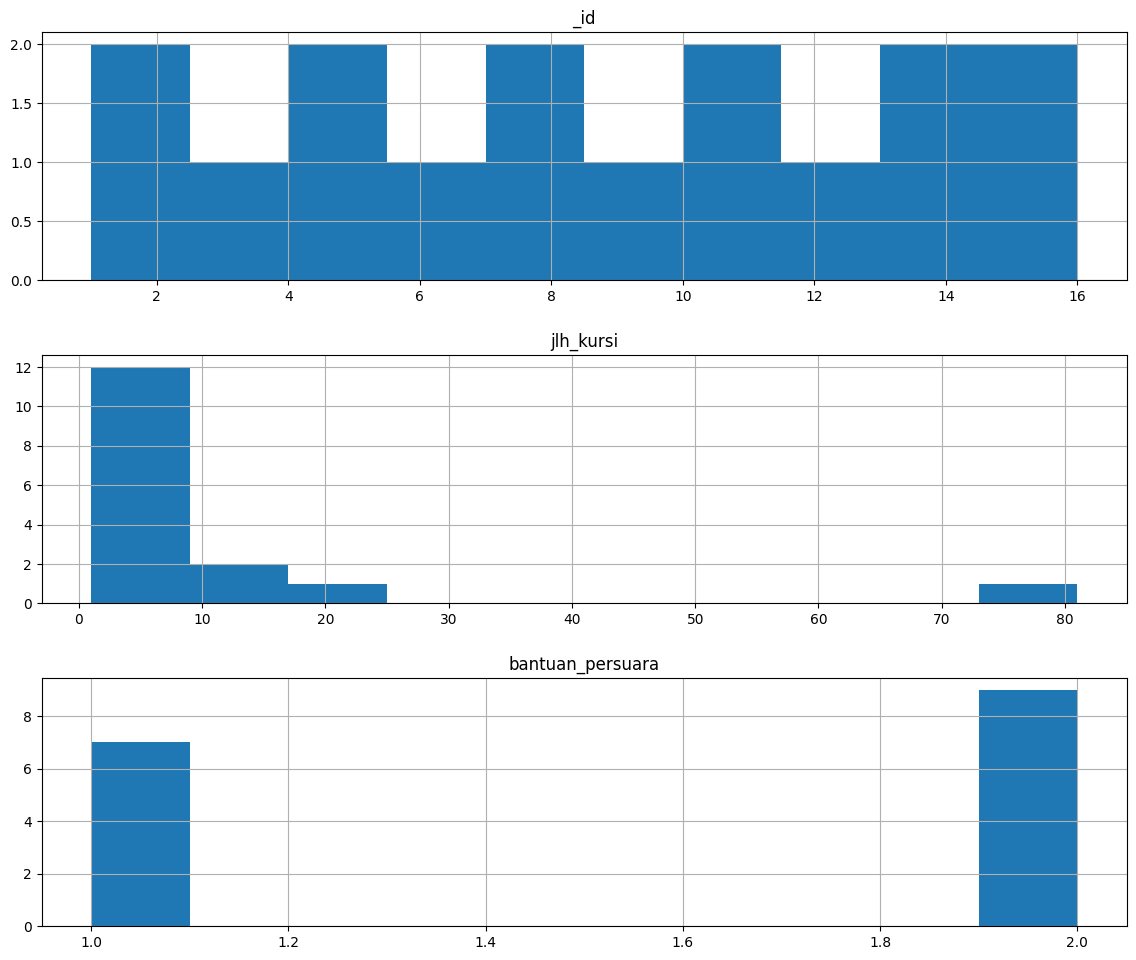

In [13]:
# Histogram Visualization
dataFrame.hist(column=index_numerical, figsize=(14,20), layout=(5,1))
plt.show()

In [14]:
# Import for Visualization
import seaborn as sns

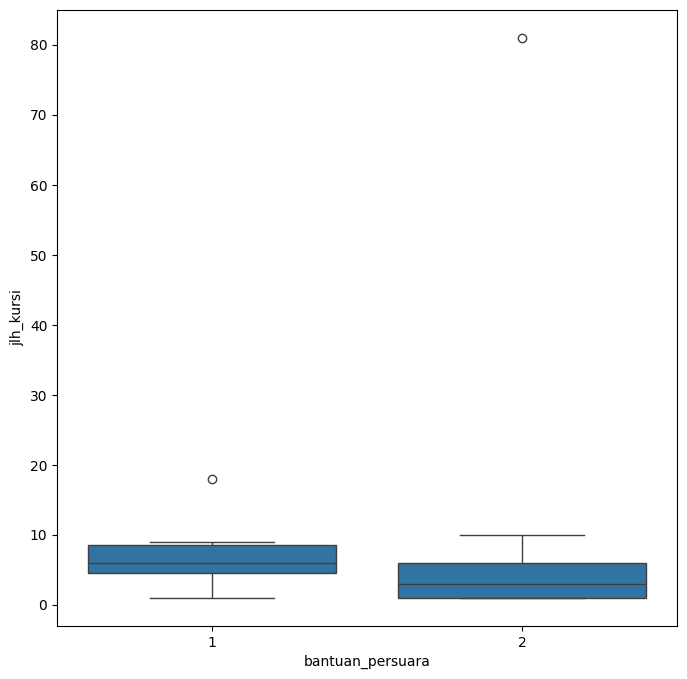

In [15]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='bantuan_persuara', y='jlh_kursi', data=dataFrame)
plt.show()

In [16]:
#bantuan_persuara dengan jlh_kursi
dataFrame[['bantuan_persuara','jlh_kursi']].groupby(['bantuan_persuara'], as_index=False).mean().sort_values(by='jlh_kursi', ascending=False)

,bantuan_persuara,jlh_kursi
1,2,12.333333
0,1,7.285714


In [17]:
# Hypothesis Test

import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [18]:
# Hipotesis ini menguji apakah H0 diterima
# Jika Hipotesis diterima, maka
# Atribut jlh_kursi terbukti tidak memiliki kontribusi untuk melakukan klasifikasi

dataFrame = dataFrame[(np.abs(stats.zscore(dataFrame["jlh_kursi"])) < 3)]

diferent_1 = dataFrame[dataFrame['bantuan_persuara']==1]['jlh_kursi']
diferent_0 = dataFrame[dataFrame['bantuan_persuara']==2]['jlh_kursi']
diferent_0 = diferent_0.values.tolist()
diferent_1 = diferent_1.values.tolist()

ttest,pval = ttest_ind(diferent_1,diferent_0,equal_var = False)
print('ttest',ttest)
print('p value',pval)


if pval <0.05:
  print('Ho ditolak')
else:
  print('Ho diterima')

ttest 1.4914081796823704
p value 0.16806933986738534
Ho diterima


In [19]:
# Attribute Category
def bar_chart(feature):
  Accepted = dataFrame[dataFrame['bantuan_persuara']==1][feature].value_counts()
  Rejected = dataFrame[dataFrame['bantuan_persuara']==2][feature].value_counts()
  df1 = pd.DataFrame([ Accepted, Rejected])
  df1.index=['Accepted','Rejected']
  df1.index=['Accepted','Rejected']
  df1.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

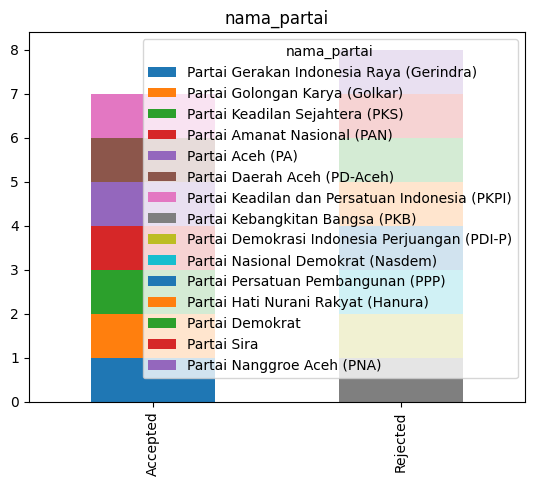

In [20]:
#Bar Chart Visualization

bar_chart('nama_partai')

In [21]:
# Contingency Table
c_t = pd.crosstab(dataFrame['nama_partai'], dataFrame['bantuan_persuara'], margins = False)
c_t

bantuan_persuara,1,2
nama_partai,,
Partai Aceh (PA),1,0
Partai Amanat Nasional (PAN),1,0
Partai Daerah Aceh (PD-Aceh),1,0
Partai Demokrasi Indonesia Perjuangan (PDI-P),0,1
Partai Demokrat,0,1
Partai Gerakan Indonesia Raya (Gerindra),1,0
Partai Golongan Karya (Golkar),1,0
Partai Hati Nurani Rakyat (Hanura),0,1
Partai Keadilan Sejahtera (PKS),1,0


In [22]:
#Import for Contingency Check

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [23]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

#interpret test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probabilitas=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
  print('Dependent (tolak H0)')
else:
  print('Independent (Terima H0)')

dof=14
p_value 0.3781546943234694
[[0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]]
probabilitas=0.990, critical=29.141, stat=15.000
Independent (Terima H0)


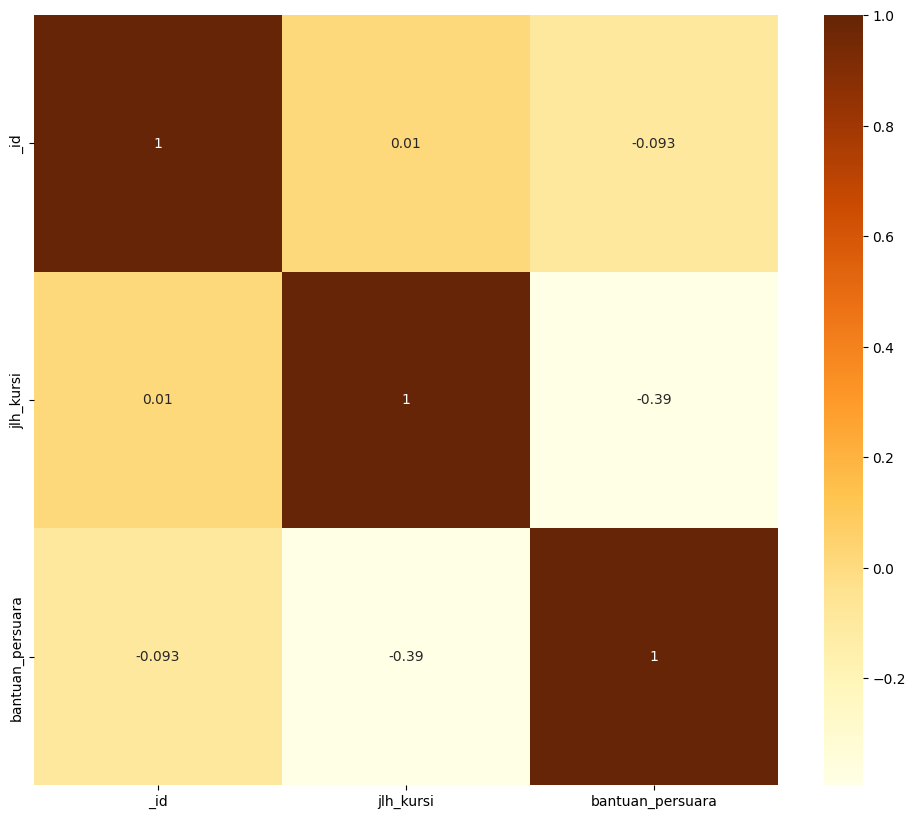

jlh_kursi           0.393378
bantuan_persuara    1.000000
Name: bantuan_persuara, dtype: float64

In [24]:
# Pearson Correlation
plt.figure(figsize=(12,10))
numeric_columns = dataFrame.select_dtypes(include=['float64', 'int64']).columns
numeric_dataFrame = dataFrame[numeric_columns]
cor = numeric_dataFrame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlOrBr)
plt.show()

#correlation with output variable
cor_target = abs(cor['bantuan_persuara'])

#selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

In [25]:
print('Selesai')

Selesai
